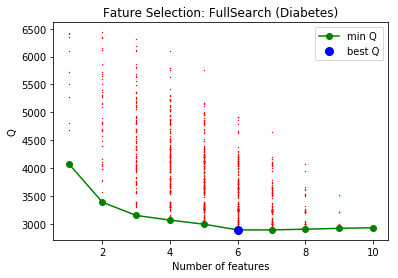

Best subset:  [1, 2, 3, 4, 5, 8]
Q best:  2891.1040287312335


In [2]:
from sklearn import datasets
import itertools
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
import optunity
import optunity.metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor as mlpr
import copy
import data_preprocessor as dp
    
def Full_Search(X_train, y_train, X_test, y_test, d):
    n = len(X_train[0])
    features = set(np.arange(0, n))
    
    Q_min = []
    
    Q_best = 1E9
    best_subset = set()
    number_of_features_in_best_subset = 4
    
    for cur_number_of_features in range(1, n+1):
        feature_subsets = itertools.combinations(features, cur_number_of_features)
        
        feature_subsets = list(feature_subsets)
        
        Q_j = []
        
        for j in range(len(feature_subsets)):
            subset = list(feature_subsets[j])
        
            model = LinearRegression()
        
            model.fit(X_train[:, subset], y_train)         
            predictions = model.predict(X_test[:, subset])
            
            cur_Q = optunity.metrics.mse(y_test, predictions)
            
            if cur_Q < Q_best:
                if cur_number_of_features - number_of_features_in_best_subset < d:
                    Q_best = copy.deepcopy(cur_Q)
                    best_subset = copy.deepcopy(subset)
                    number_of_features_in_best_subset = copy.deepcopy(cur_number_of_features)
                else:
                    return best_subset
            
            Q_j.append(cur_Q)
        
        plt.plot([cur_number_of_features] * len(Q_j) , Q_j, 'bs', color = 'red', 
                 markersize = 0.4)
            
        Q_min.append(min(Q_j))
        
        
    index_of_the_best = Q_min.index(min(Q_min))
        
    plt.plot(np.arange(1, 11), Q_min, 'ro-', color = 'green', label = 'min Q')
    
    plt.plot([index_of_the_best+1], Q_min[index_of_the_best], 'ro', 
             markersize = 8.0,
             color = 'blue', label = 'best Q')
    
    plt.xlabel('Number of features')
    plt.ylabel('Q')
    plt.title('Fature Selection: FullSearch (Diabetes)')   
    
    plt.legend()
    
    plt.rcParams["figure.figsize"] = (12, 4)
    
    plt.show()
    
    return best_subset, min(Q_min)


data_preprocessor = dp.Data_Preprocessor()
X_train, y_train, X_test, y_test, feature_names = data_preprocessor.Prepare_data('diabetes')

best_subset, Q_best = Full_Search(X_train, y_train, X_test, y_test, d = 3)
       
print("Best subset: ", best_subset)
print("Q best: ", Q_best)
